In [0]:
!nvidia-smi

Sun Feb 23 10:16:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 挂载云盘到Colab

In [0]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

# 更改工程的运行文件夹
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 1. 观察数据及前期数据预处理

In [0]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# 加载训练集进行数据分析
train_row_data_path = './Task2/train/train_author.json'
train_pub_data_path = './Task2/train/train_pub.json'

train_data = json.load(open(train_row_data_path, 'r', encoding='utf-8'))
train_pub_data = json.load(open(train_pub_data_path, 'r', encoding='utf-8'))

In [0]:
author_names = [name for name in train_data]
nums_duplication_author = [len(train_data[author].keys()) for author in train_data]

print("训练集同名作者数目: ", len(author_names))
print("实际作者个数: ", sum(nums_duplication_author))


训练集同名作者数目:  221
实际作者个数:  22839


#### 1.1 绘制训练集同名作者情况

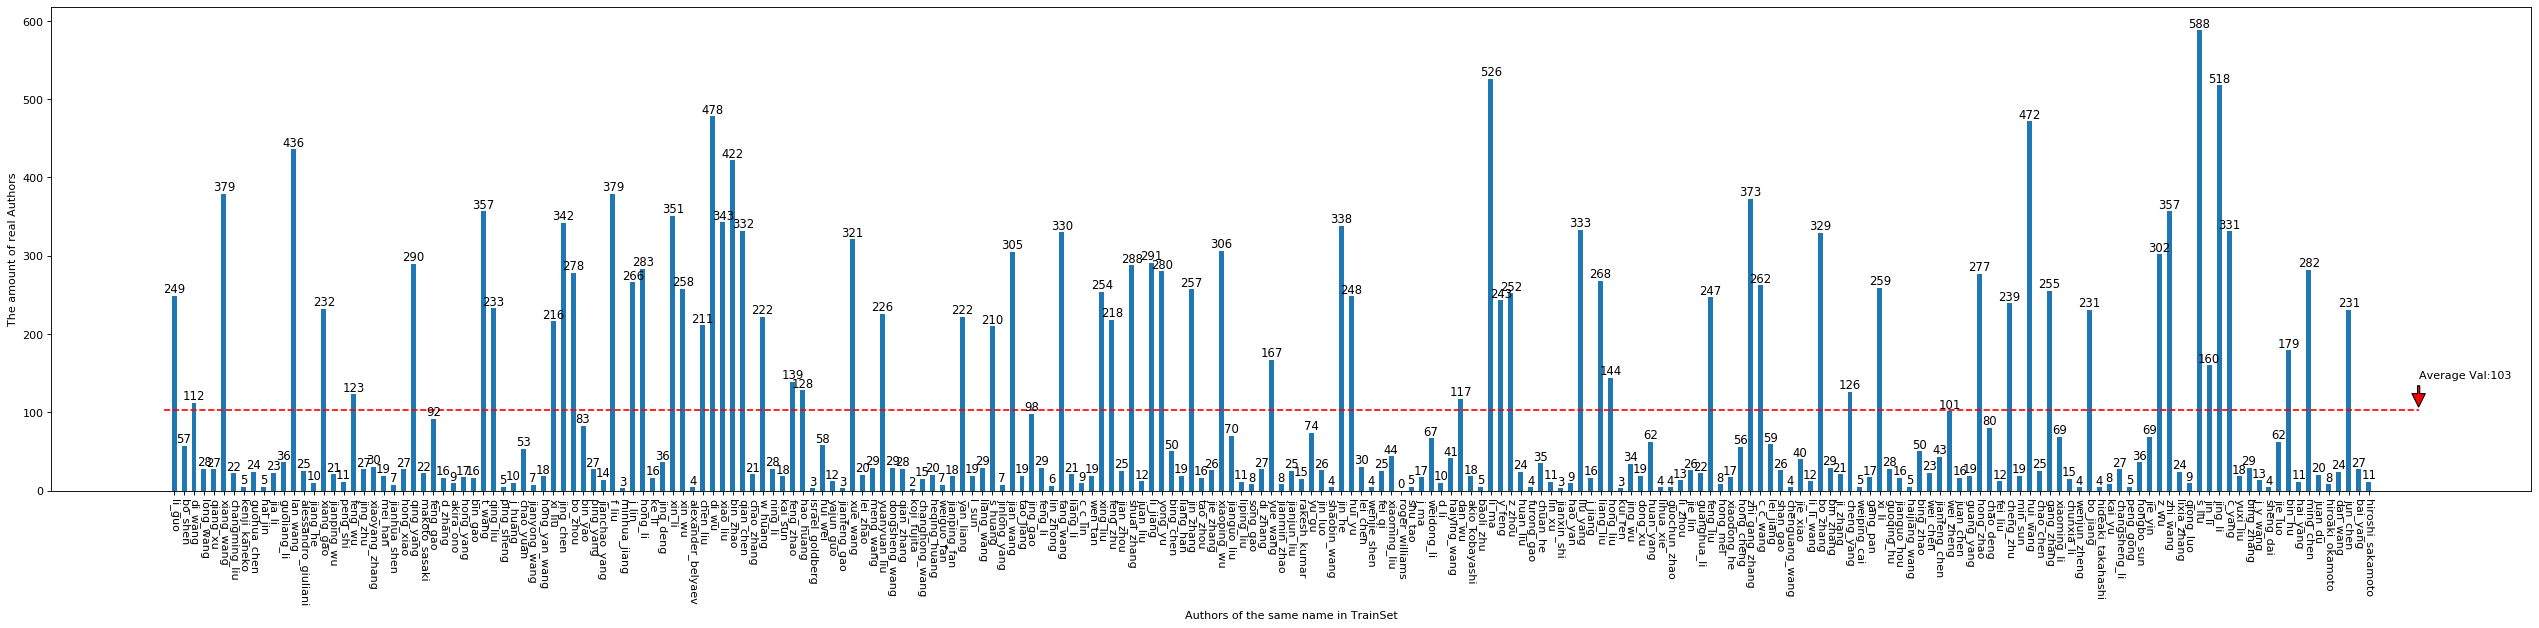

In [0]:
plt.figure(figsize=(40, 8), dpi=80)
x = range(len(author_names))
plt.bar(x, nums_duplication_author, width=0.5)
plt.xticks(x, author_names, rotation=270)
plt.xlabel("Authors of the same name in TrainSet")
plt.ylabel("The amount of real Authors")

for xl, yl in zip(x, nums_duplication_author):
    plt.text(xl, yl+0.3, str(yl), ha='center', va='bottom', fontsize=10.5)

mean_person = int(np.mean(nums_duplication_author))
plt.gca().hlines(mean_person,-1,225,linestyles='--',colors='red',label='Average Val')
plt.annotate(u"Average Val:" + str(mean_person), xy = (225, mean_person), xytext = (225, mean_person+40),arrowprops=dict(facecolor='red',shrink=0.1,width=2))

plt.savefig('train_data.png')
plt.show()


#### 1.2 绘制训练集同名作者论文数

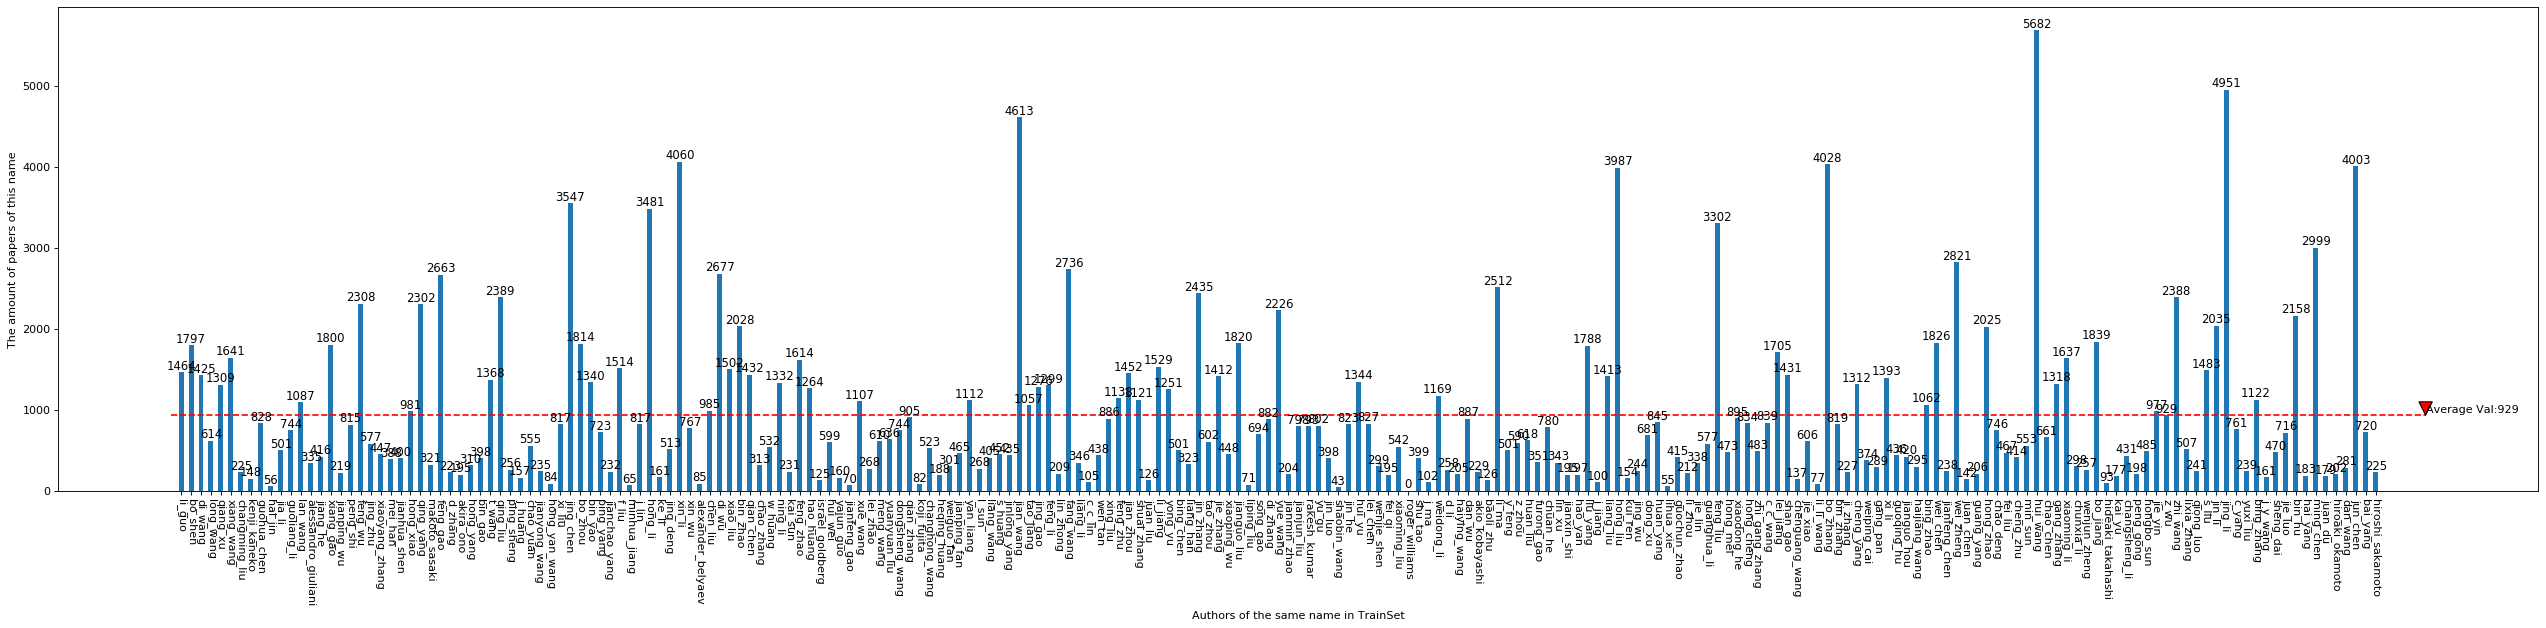

In [0]:
authors_num_papers = []
for author in train_data:
  num = 0;
  for author_id in train_data[author]:
    num += len(train_data[author][author_id])
  authors_num_papers.append(num)

plt.figure(figsize=(40, 8), dpi=80)
x = range(len(author_names))

plt.bar(x, authors_num_papers, width=0.5)
plt.xticks(x, author_names, rotation=270)
plt.xlabel("Authors of the same name in TrainSet")
plt.ylabel("The amount of papers of this name")

for xl, yl in zip(x, authors_num_papers):
    plt.text(xl, yl+0.3, str(yl), ha='center', va='bottom', fontsize=10.5)

mean_person = int(np.mean(authors_num_papers))
plt.gca().hlines(mean_person,-1,225,linestyles='--',colors='red',label='Average Val')
plt.annotate(u"Average Val:" + str(mean_person), xy = (225, mean_person), xytext = (225, mean_person+40),arrowprops=dict(facecolor='red',shrink=0.1,width=2))

plt.savefig('train_authors.png')
plt.show()

#### 1.3 验证集数据分析

In [0]:
valid_row_data_path = './Task2/sna_data/sna_valid_author_raw.json'
valid_pub_data_path = './Task2/sna_data/sna_valid_pub.json'

valid_pub_data = json.load(open(valid_pub_data_path, 'r', encoding='utf-8'))
valid_data = json.load(open(valid_row_data_path, 'r', encoding='utf-8'))

# 查看数据格式
for dict_item in valid_data.items():
  print(dict_item)
  break

for dict_item in valid_pub_data.items():
  print(dict_item)
  break

('heng_li', ['zszavvJh', 'a2Tl88Xu', 'X3Y0AYBw', '0kUbjIMW', '4bKZMNxE', 'vbQeLjWI', 'ZfSbG5ME', 'ierOTBz1', '6cXZA7zu', 'cXBXYa63', '141Kx9Ce', 'Gfl2GwXG', '98xkec8D', '2MIIwgBH', 'yVCAyLJo', 'NaPOuXXF', 'YoRqTILd', 'V8UOM2uU', 'wtiZkPVr', 'qggv8F0K', 'uDsLiLZd', 'FIVcmK6w', 'M2YJ0Dfa', 'QqQNHt3b', 'Cpi5vz3j', '7wJu2eAh', 'dUlZsS5z', 'cZnZW9uz', 'bxkStxS7', 'TH4B6A7Y', 'xn3xJkGU', 'xsbQHWyq', 'B5HNDTzE', 'MsT3Sml8', 'PO61SLCN', 'SCvnHfAx', 'pFmfB3Hm', 'qFyL0b7h', 'MdbnxBrH', 'WDe4ltiG', '4eHVOVB7', '8OiM0qmf', 'Q62Py6ew', 'Jmcve9yI', '475s6I47', 'OnwXGiRR', 'CUbTTLzf', '4DaB8tVN', 'oim5ZjhO', 'OyhZ1MiB', 'KZzOrPpy', 's0UYiQ6B', '0GzWz3O4', 'kWe0u2Ih', 'AyFd9xZZ', 'N7J7fEeF', 'C1WBo3Cs', 'Lg5JGKID', 'W6leQ8fX', 'qyh46ML8', 'ojqAGDyS', 'aA4FOt2Y', 'x3h6uA0c', 'tWxrqzEO', 'goiijZU0', 'wyionLg7', 'RQzk9gxv', 'spGZlbgg', 'X7DSjudv', 'JOAqAYeR', 'ynRw5omI', 'cQAaLgVP', '2J2G5bPa', '8X7NKYO8', 'eFRsCR81', 'KSWkp6m2', 'wme6V0aL', '5HLZuQ0p', 'dP2aIUjO', 'Vif917Gy', 'c8ngM97e', 'OFZvRrAJ', 'YZ

In [0]:
merge_data = {}
for author in valid_data.keys():
    merge_data[author] = [valid_pub_data[paper_id] for paper_id in valid_data[author]]

# 验证集数据分析
authors = list(valid_data.keys())
papers_perauthor = [len(valid_data[author]) for author in valid_data]
print('同名作者数量：', len(authors))
print('涉及的论文数：', np.sum(papers_perauthor))
print('每个作者平均论文数量：', np.mean(papers_perauthor))
print('提供的论文数：',len(valid_pub_data))
print('提供论文数小于涉及论文数，可能原因是作者里有论文的共同作者')

同名作者数量： 50
涉及的论文数： 45898
每个作者平均论文数量： 917.96
提供的论文数： 45416
提供论文数小于涉及论文数，可能原因是作者里有论文的共同作者


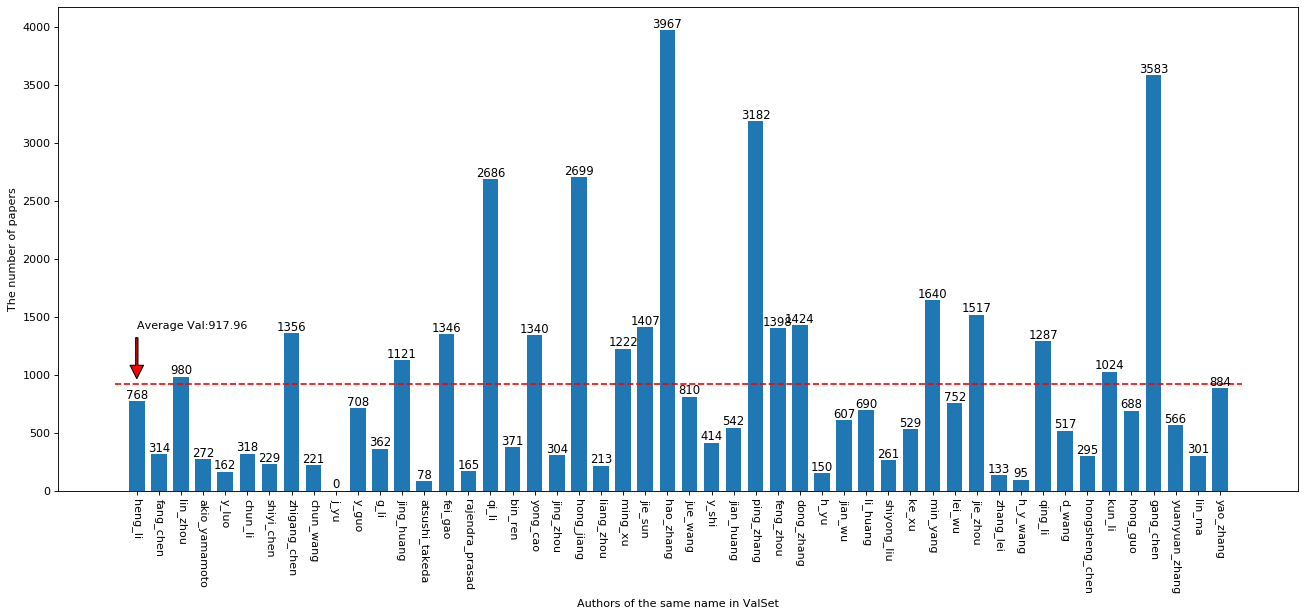

In [0]:
# 绘制同名作者论文数量
plt.figure(figsize=(20, 8), dpi=80)
x = range(len(authors))

plt.bar(x, papers_perauthor, width=0.7)
plt.xticks(x, authors)
plt.xticks(rotation=270)
plt.xlabel('Authors of the same name in ValSet')
plt.ylabel('The number of papers')
for xl, yl in zip(x, papers_perauthor):
    plt.text(xl, yl+0.3, str(yl), ha='center', va='bottom', fontsize=10.5)

mean_papers = np.mean(papers_perauthor)
plt.gca().hlines(mean_papers,-1,50,linestyles='--',colors='red',label='Average Val')
plt.annotate(u"Average Val:"+str(mean_papers), xy = (0, mean_papers), xytext = (0, 1400),arrowprops=dict(facecolor='red',shrink=0.1,width=2))

plt.show()

In [0]:
## 随机抽取一个作者进行分析
index = np.random.choice(len(authors))
author = authors[index]
# author = 'atsushi_takeda'
papers = merge_data[author]

print('待消歧作者名：', author)
print('总涉及论文数目：', len(papers))

待消歧作者名： rajendra_prasad
总涉及论文数目： 165


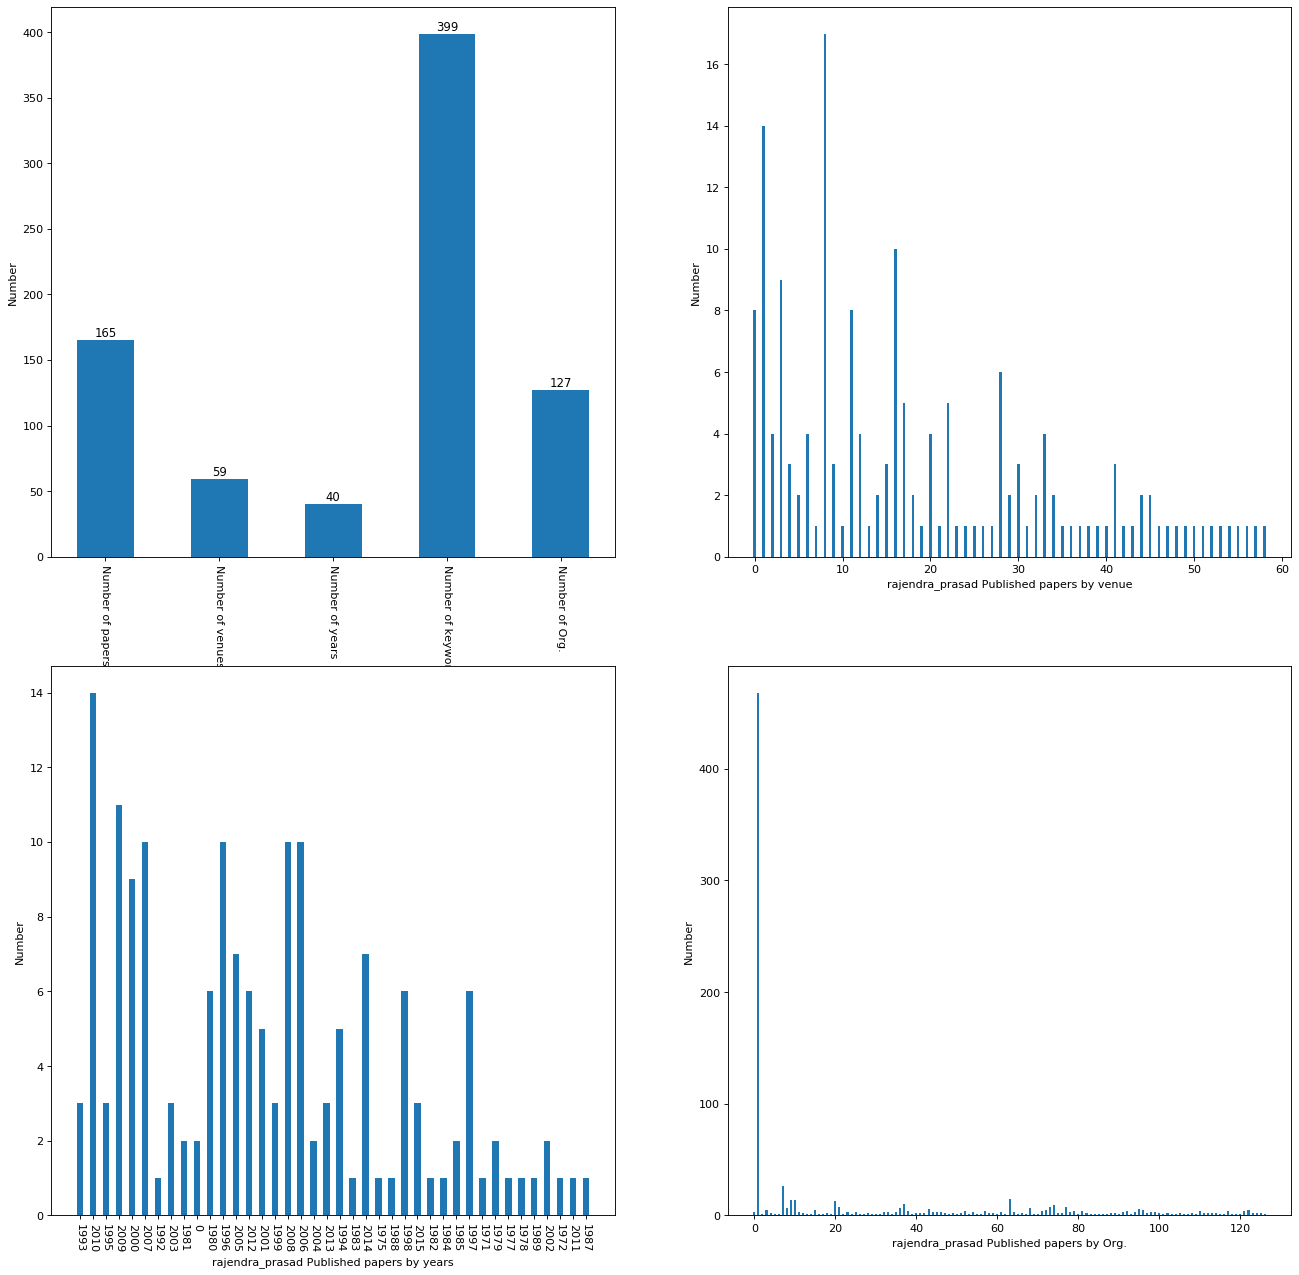

In [0]:
# defaultdict 可以处理缺省key值,int返回0
venue_dict = defaultdict(int)
year_dict = defaultdict(int)
keywords_dict = defaultdict(int)
org_dict = defaultdict(int)

for paper in papers:
    authors = paper['authors'] if 'authors' in paper else []
    venues = paper['venue'] if 'venue' in paper else ''
    years = paper['year'] if 'year' in paper else 0
    keywords = paper['keywords'] if 'keywords' in paper else []

    venue_dict[venues] += 1
    year_dict[years] += 1
    for keyword in keywords:
        keywords_dict[keyword] += 1

    for paper_author in authors:
        name = paper_author['name']
        org =  paper_author['org'] if 'org' in paper_author else ""
        org_dict[org] += 1


# 绘制该名称下论文数据情况
fig = plt.figure(figsize=(20, 20), dpi=80)

ax1 = fig.add_subplot(2,2,1)
x = range(5)
y = [len(papers), len(venue_dict), len(year_dict), len(keywords_dict), len(org_dict)]
s = ['Number of papers', 'Number of venues', 'Number of years', 'Number of keywords', 'Number of Org.']

plt.bar(x, y, width=0.5)
plt.xticks(x, s, rotation=270)  
plt.xlabel('%s Info about papers' % author)
plt.ylabel('Number')
for xl, yl in zip(x, y):
    plt.text(xl, yl+0.3, str(yl), ha='center', va='bottom', fontsize=10.5)

ax2 = fig.add_subplot(2,2,2)
plt.bar(range(len(venue_dict)), venue_dict.values(), width=0.3)
plt.xlabel('%s Published papers by venue' % author)
plt.ylabel('Number')

ax3 = fig.add_subplot(2,2,3)
plt.bar(range(len(year_dict)), year_dict.values(), width=0.5)
plt.xticks(range(len(year_dict)), year_dict.keys(), rotation=270)
plt.xlabel('%s Published papers by years' % author)
plt.ylabel('Number')

ax4 = fig.add_subplot(2,2,4)
plt.bar(range(len(org_dict)), org_dict.values(), width=0.5)  
plt.xlabel('%s Published papers by Org.' % author)
plt.ylabel('Number')

plt.show()